In [1]:
import os, sys

# Add the source code file in the path.
module_path = os.path.abspath(os.path.join('../src/'))

if module_path not in sys.path:
    sys.path.append(module_path)
# _end_if_

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from som import SOM
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
# Load breast cancer data data.
breast_cancer = datasets.load_breast_cancer()

In [5]:
# Create a data scaler.
scaler = StandardScaler()

# Scale the data.
breast_cancer.data = scaler.fit_transform(breast_cancer.data)

In [6]:
# Get the dimensions of the data.
N, D = breast_cancer.data.shape

In [7]:
# Random shuffle the data indexes.
idx = np.arange(N)
np.random.shuffle(idx)

In [8]:
# Split randomly train/test.
train_data = breast_cancer.data[idx[:500], :]
train_label = breast_cancer.target[idx[:500]]

test_data = breast_cancer.data[idx[500:], :]
test_label = breast_cancer.target[idx[500:]]

In [9]:
# Build the SOM model.
som_model = SOM(m=20, d=train_data.shape[1])

 SOM training started ...
 [2024-03-27 12:37:23] -> Epoch 10: Error 0.228666
 [2024-03-27 12:37:35] -> Epoch 20: Error 0.160197
 [2024-03-27 12:37:44] -> Epoch 30: Error 0.087534
 [2024-03-27 12:37:50] -> Epoch 40: Error 0.018055
 [2024-03-27 12:37:55] -> Epoch 50: Error 0.002181
 [2024-03-27 12:37:59] -> Epoch 60: Error 0.002954
 [2024-03-27 12:38:01] -> Epoch 70: Error 0.001287
 [2024-03-27 12:38:04] -> Epoch 80: Error 0.002784
 [2024-03-27 12:38:05] -> Epoch 90: Error 0.000759
 [2024-03-27 12:38:07] -> Epoch 100: Error 0.000767
 [2024-03-27 12:38:08] -> Epoch 110: Error 0.026695
 [2024-03-27 12:38:09] -> Epoch 120: Error 0.005391
 [2024-03-27 12:38:10] -> Epoch 130: Error 0.001642
 [2024-03-27 12:38:11] -> Epoch 140: Error 0.000654
 [2024-03-27 12:38:12] -> Epoch 150: Error 0.000314
 [2024-03-27 12:38:13] -> Epoch 160: Error 0.000172
 Training process ended in: 67.357 sec.
 SOM training converged at epoch 164 with error 0.000139.


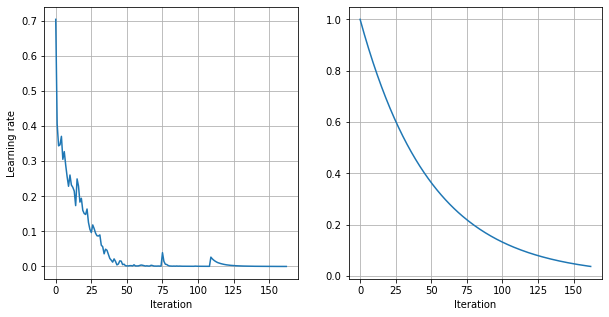

In [10]:
# Reset the model.
som_model.reset_network()

# Fit it to the data
som_model.train(train_data, epochs=500)

# Plot the errors.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# ------------------------

ax[0].plot(som_model.errors);
ax[0].grid(True);
ax[0].set_xlabel("Iteration"); ax[0].set_ylabel("Error");

# ------------------------
ax[1].plot(som_model.eta);
ax[1].grid(True);
ax[1].set_xlabel("Iteration"); ax[0].set_ylabel("Learning rate");

In [11]:
# This will return the positions (on the grid) of the data used to train the network.
predictions_train = som_model.predict(train_data)

# This will give the positions of the test (unseen) data on the trained grid.
predictions_test = som_model.predict(test_data)

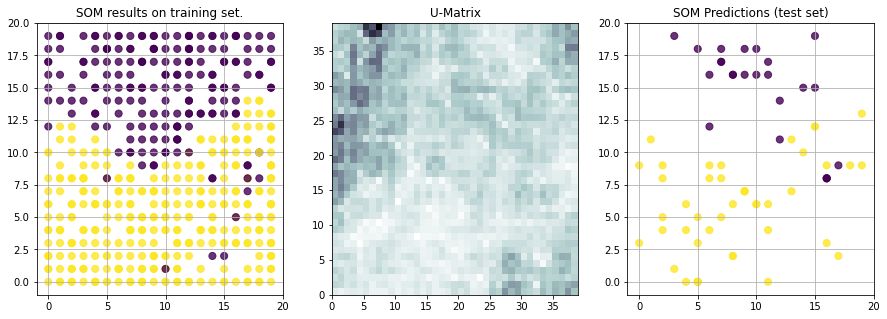

In [12]:
# Get the model network dimensions.
m, n, _ = som_model.shape

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(predictions_train[:, 0],
              predictions_train[:, 1],
              c=train_label, alpha=0.8, s=50)
ax[0].title.set_text('SOM results on training set.')
ax[0].set_xlim([-1, m])
ax[0].set_ylim([-1, n])
ax[0].grid(True)

# ------------------------

ax[1].pcolor(som_model.u_matrix.T, cmap='bone_r')
ax[1].title.set_text('U-Matrix')

# ------------------------
ax[2].scatter(predictions_test[:, 0],
              predictions_test[:, 1],
              c=test_label, alpha=0.8, s=50)
ax[2].title.set_text('SOM Predictions (test set)')
ax[2].set_xlim([-1, m])
ax[2].set_ylim([-1, n])
ax[2].grid(True)